In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import src.diccionarios_map as dicmap
import src.funciones_limpieza as funlimp


In [3]:
import importlib


importlib.reload(dicmap)
importlib.reload(funlimp)

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.1f}".format)

In [4]:
#Exportar data
df = pd.read_csv("../data/fifa_22.csv", encoding='utf-8')

#Primer screenschot
display(df.head(2))
df.info()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,€107.5M,€250K,2341,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",NaN,2025,179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,NaN,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,€93M,€140K,2314,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos11"">LDM",8.0,"Jul 1, 2018",NaN,2026,189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,NaN,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  object 
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

In [5]:
#Eliminar columnas no necesarias
columnas_eliminar = dicmap.drop_columns
df = df.drop(columns=columnas_eliminar)
df.head(3)


,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,Weak Foot,Skill Moves,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness
0,Bruno Fernandes,26,Portugal,88,89,Manchester United,€107.5M,€250K,Right,3.0,4.0,"<span class=""pos pos18"">CAM",179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,73.0,65.0,12.0,14.0,15.0,8.0,14.0,72.0
1,L. Goretzka,26,Germany,87,88,FC Bayern München,€93M,€140K,Right,4.0,3.0,"<span class=""pos pos11"">LDM",189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,85.0,77.0,13.0,8.0,15.0,11.0,9.0,74.0
2,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,€44.5M,€135K,Right,4.0,3.0,"<span class=""pos pos24"">RS",182cm,83kg,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,42.0


In [6]:
#Limpiar dato de valor y salario
df["Valor_real"] = df["Value"].astype(str).str[1:]
df["Salario_real"] = df["Wage"].astype(str).str[1:]

df["Valor_real"] = df["Valor_real"].apply(funlimp.limpiar_valor)
df["Salario_real"] = df["Salario_real"].apply(funlimp.limpiar_valor)

df.drop(columns=["Value", "Wage"], inplace=True)
df.head(3)



,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Weak Foot,Skill Moves,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness,Valor_real,Salario_real
0,Bruno Fernandes,26,Portugal,88,89,Manchester United,Right,3.0,4.0,"<span class=""pos pos18"">CAM",179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,73.0,65.0,12.0,14.0,15.0,8.0,14.0,72.0,107500000.0,250000.0
1,L. Goretzka,26,Germany,87,88,FC Bayern München,Right,4.0,3.0,"<span class=""pos pos11"">LDM",189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,85.0,77.0,13.0,8.0,15.0,11.0,9.0,74.0,93000000.0,140000.0
2,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,Right,4.0,3.0,"<span class=""pos pos24"">RS",182cm,83kg,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,42.0,44500000.0,135000.0


In [7]:
#Limpiar valor posicion
df["Posicion_real"] = df["Position"].str.split(">").str[1]

df['Posicion_real'] = df['Posicion_real'].replace(dicmap.posiciones)

df = df.loc[df['Posicion_real'] != 'Otros']

df.drop(columns='Position', inplace=True )

display(df["Posicion_real"].value_counts())
df.head(3)



Posicion_real
Mediocampo defensivo    1423
Defensa central         1370
Defensa lateral         1048
Delantero central        912
Mediocampo lateral       719
Arqueros                 572
Delantero lateral        421
Mediocampo ofensivo      322
Name: count, dtype: int64

,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness,Valor_real,Salario_real,Posicion_real
0,Bruno Fernandes,26,Portugal,88,89,Manchester United,Right,3.0,4.0,179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,73.0,65.0,12.0,14.0,15.0,8.0,14.0,72.0,107500000.0,250000.0,Mediocampo ofensivo
1,L. Goretzka,26,Germany,87,88,FC Bayern München,Right,4.0,3.0,189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,85.0,77.0,13.0,8.0,15.0,11.0,9.0,74.0,93000000.0,140000.0,Mediocampo defensivo
2,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,Right,4.0,3.0,182cm,83kg,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,42.0,44500000.0,135000.0,Delantero central


In [8]:
#Limpiar columna peso
df['Peso_real'] = df['Weight'].apply(funlimp.limpiar_altura_peso)
df['Altura_real'] = df['Height'].apply(funlimp.limpiar_altura_peso)

df.drop(columns=['Height','Weight'], inplace=True)
df.head(3)




,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness,Valor_real,Salario_real,Posicion_real,Peso_real,Altura_real
0,Bruno Fernandes,26,Portugal,88,89,Manchester United,Right,3.0,4.0,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,73.0,65.0,12.0,14.0,15.0,8.0,14.0,72.0,107500000.0,250000.0,Mediocampo ofensivo,69,179
1,L. Goretzka,26,Germany,87,88,FC Bayern München,Right,4.0,3.0,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,85.0,77.0,13.0,8.0,15.0,11.0,9.0,74.0,93000000.0,140000.0,Mediocampo defensivo,82,189
2,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,Right,4.0,3.0,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,42.0,44500000.0,135000.0,Delantero central,83,182


In [9]:
#Resumen estadistico
display(df.describe())



,Age,Overall,Potential,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness,Valor_real,Salario_real,Peso_real,Altura_real
count,6813.0,6813.0,6813.0,6813.0,6813.0,6813.0,6813.0,6813.0,6813.0,6794.0,6813.0,6794.0,6813.0,6813.0,6813.0,6813.0,6813.0,6794.0,6813.0,6794.0,6813.0,6794.0,6813.0,6813.0,6813.0,6813.0,6808.0,6808.0,6794.0,6813.0,6715.0,6813.0,6794.0,6813.0,6813.0,6813.0,6813.0,6813.0,6583.0,6813.0,6813.0,6813.0,6813.0
mean,26.9,70.1,73.3,3.0,2.5,54.5,50.2,56.4,63.8,47.1,60.4,52.7,47.2,58.4,63.6,66.5,66.7,66.3,66.5,65.4,62.6,67.7,68.5,68.9,52.1,61.2,52.0,55.1,58.7,51.7,63.9,52.6,50.0,15.6,15.4,15.4,15.5,15.7,51.9,4953741.5,14168.5,75.8,181.6
std,4.5,5.8,5.8,0.7,0.8,17.8,19.6,16.9,13.1,18.2,17.6,18.5,18.2,13.9,15.1,14.8,14.5,14.5,7.7,14.3,12.8,12.2,14.9,11.8,19.3,16.3,20.5,19.3,13.3,15.9,10.6,21.3,21.2,17.3,16.6,16.3,17.0,17.6,19.9,11108561.8,26265.8,7.2,6.9
min,17.0,44.0,56.0,1.0,1.0,7.0,3.0,7.0,11.0,4.0,5.0,8.0,6.0,11.0,10.0,15.0,15.0,19.0,34.0,19.0,14.0,27.0,14.0,25.0,4.0,11.0,6.0,3.0,10.0,8.0,12.0,7.0,6.0,2.0,2.0,2.0,2.0,2.0,3.0,0.0,0.0,53.0,155.0
25%,23.0,66.0,69.0,3.0,2.0,45.0,35.0,49.0,60.0,33.0,56.0,41.0,34.0,52.0,60.0,58.0,59.0,59.0,61.0,57.0,54.0,60.0,64.0,62.0,39.0,53.0,33.0,46.0,50.0,41.0,58.0,33.0,30.0,8.0,8.0,8.0,8.0,8.0,35.0,875000.0,2000.0,70.0,177.0
50%,27.0,70.0,73.0,3.0,3.0,59.0,55.0,59.0,66.0,49.0,65.0,56.0,47.0,61.0,67.0,69.0,69.0,69.0,66.0,68.0,65.0,69.0,71.0,70.0,58.0,65.0,60.0,60.0,61.0,53.0,65.0,62.0,58.0,11.0,11.0,11.0,11.0,11.0,59.0,1700000.0,6000.0,75.0,182.0
75%,30.0,74.0,77.0,3.0,3.0,67.0,66.0,68.0,72.0,61.0,72.0,67.0,62.0,68.0,72.0,77.0,77.0,76.0,72.0,76.0,72.0,76.0,78.0,77.0,67.0,73.0,68.0,69.0,68.0,64.0,71.0,69.0,67.0,14.0,14.0,14.0,14.0,14.0,67.0,3700000.0,15000.0,80.0,187.0
max,43.0,93.0,95.0,5.0,5.0,94.0,95.0,93.0,94.0,90.0,96.0,94.0,94.0,93.0,96.0,97.0,97.0,96.0,96.0,95.0,95.0,95.0,97.0,96.0,94.0,95.0,95.0,96.0,95.0,93.0,96.0,93.0,95.0,91.0,92.0,93.0,93.0,90.0,92.0,194000000.0,350000.0,103.0,203.0


In [10]:
##Analisis de distribucion de lo datos numericos

# col_num = df.select_dtypes(include='number')

# for col in col_num:
#     plt.figure(figsize=(3,3))
#     sns.histplot(data=df[col], kde=True, bins=30)
#     plt.title(f"Distribucion de {col}", fontsize=8)
#     plt.xticks(fontsize=8)
#     plt.ylabel("Cantidad")
#     plt.yticks(fontsize=8)
#     plt.tight_layout()
#     plt.show()

In [11]:
# Construccion de dataframe segmentado por arqueros.

col_categoricas = df.select_dtypes(include='object').columns.to_list()

col_caracteristicas = [ "Peso_real", "Altura_real", "Age"]

col_salario = ['Salario_real']

col_potencial = ["Overall", "Potential"]

col_arquero = ["GKDiving", "GKHandling", "GKKicking", "GKPositioning", "GKReflexes" ]


df_arqueros = df[col_categoricas + col_caracteristicas  + col_potencial +  col_arquero + col_salario]

df_arqueros = df_arqueros.loc[df_arqueros['Posicion_real'].str.contains("Arqueros", na=False)]






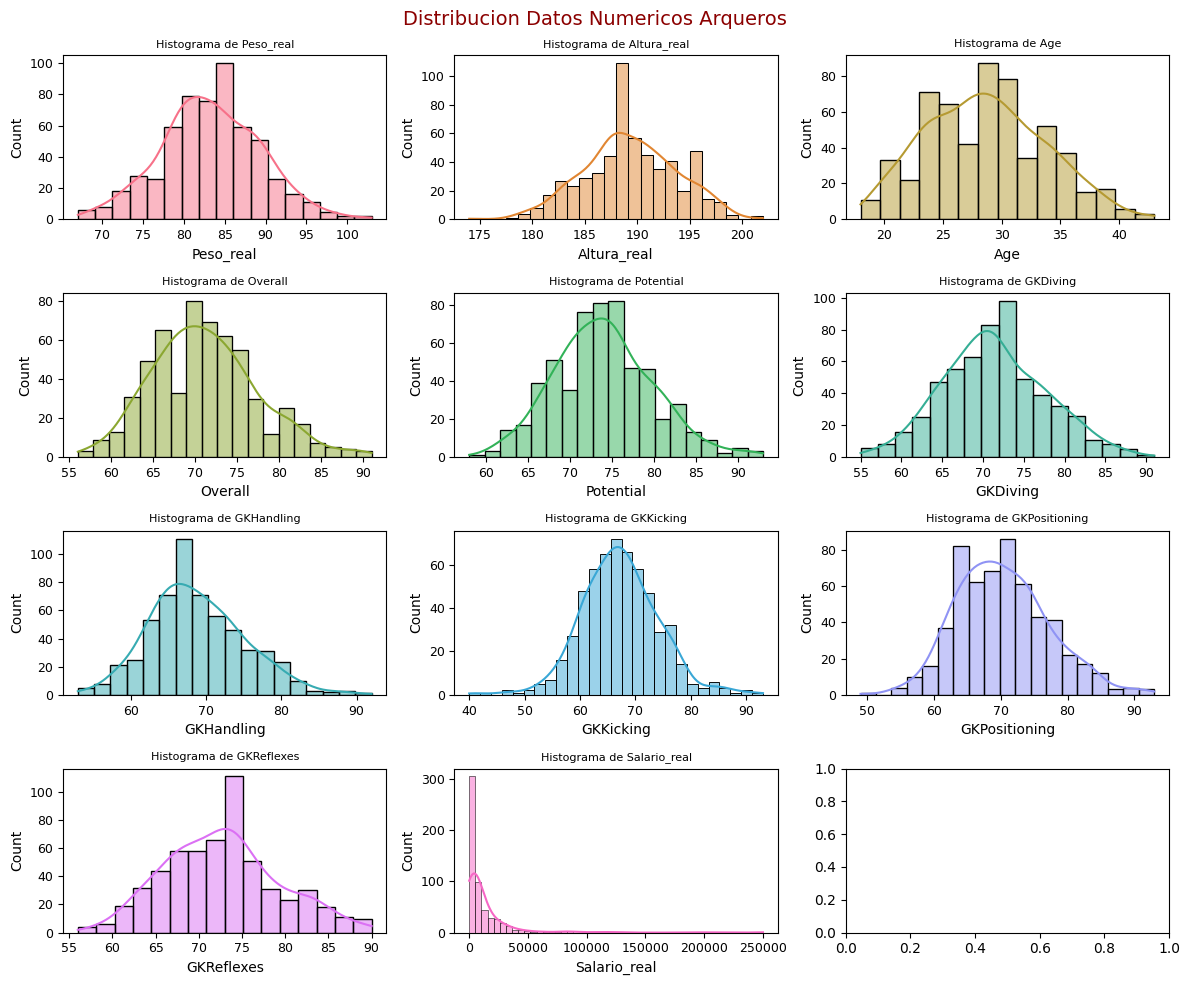

In [12]:
col_num = df_arqueros.select_dtypes(include='number')

col_list = col_num.columns


fig, axes = plt.subplots(4, 3, figsize=(12, 10), )
axes = axes.flatten()

colors = sns.color_palette("husl", len(col_list))  # tantos colores como columnas

for i, col in enumerate(col_list):
    sns.histplot(data=df_arqueros, x=col, kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(f"Histograma de {col}", fontsize=8)
    axes[i].tick_params(axis='x', labelsize=9)
    axes[i].tick_params(axis='y', labelsize=9)

fig.suptitle("Distribucion Datos Numericos Arqueros", fontsize=14, color='darkred')
plt.tight_layout()
plt.show()




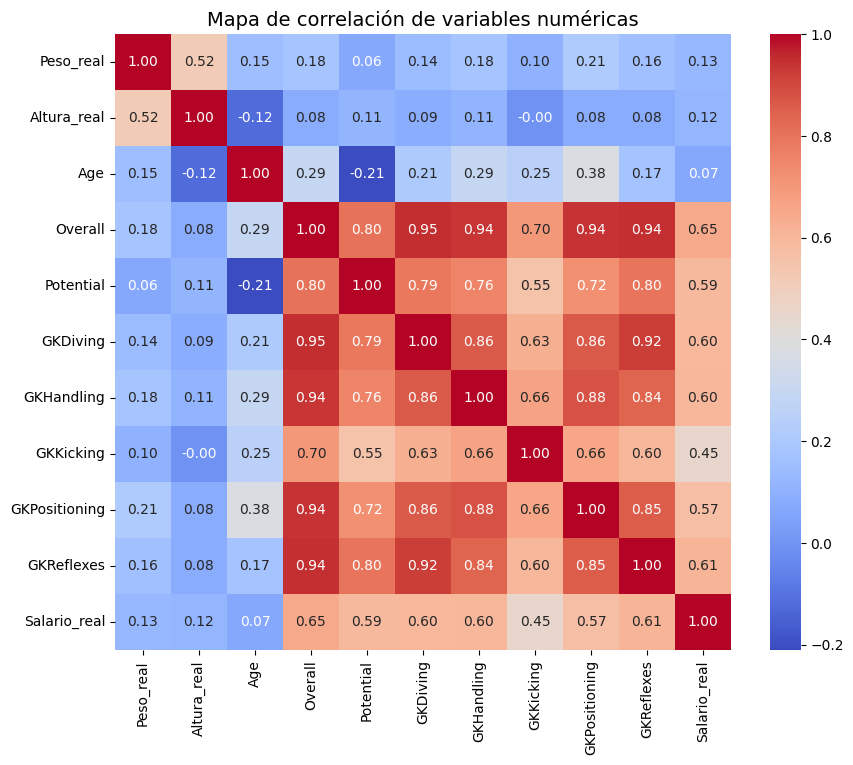

In [13]:
corr = col_num.corr()

plt.figure(figsize=(10,8))  # tamaño del gráfico

sns.heatmap(corr, 
            annot=True,       # muestra los valores en cada celda
            fmt=".2f",        # formato de los números
            cmap="coolwarm",  # paleta de colores
            cbar=True,        # mostrar barra de colores
            square=True)      # cuadrado para cada celda

plt.title("Mapa de correlación de variables numéricas", fontsize=14)
plt.show()

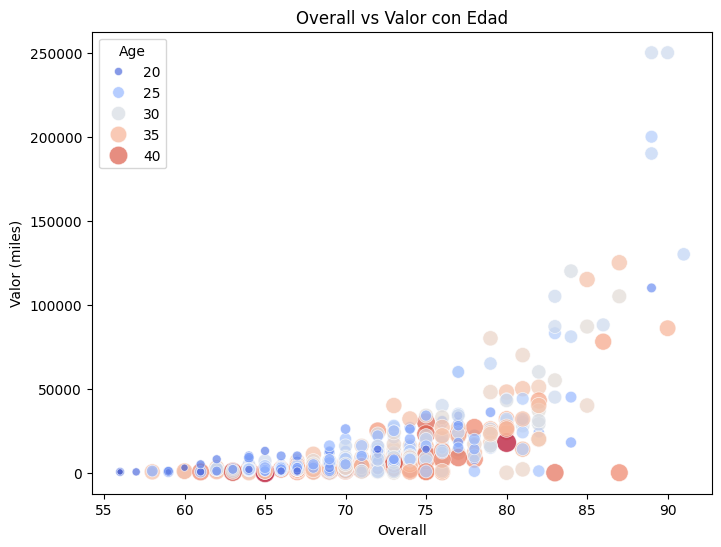

In [14]:
plt.figure(figsize=(8,6))


sns.scatterplot(
    data=df_arqueros,
    x="Overall",
    y="Salario_real",
    hue="Age",               
    size="Age",              
    palette="coolwarm",
    sizes=(20, 200),
    alpha=0.7                
)
plt.title("Overall vs Valor con Edad")
plt.xlabel("Overall")
plt.ylabel("Valor (miles)")
plt.show()



In [15]:
df_arqueros_filtrado = df_arqueros[
    (df_arqueros["Age"] > 20) &
    (df_arqueros["Age"] < 25) &
    (df_arqueros["Overall"] > 85)
]

df_arqueros_filtrado = df_arqueros_filtrado.sort_values('Age')

df_arqueros_filtrado

,Name,Nationality,Club,Preferred Foot,Posicion_real,Peso_real,Altura_real,Age,Overall,Potential,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Salario_real
14608,G. Donnarumma,Italy,Paris Saint-Germain,Right,Arqueros,90,196,22,89,93,91.0,83.0,79.0,85.0,90.0,110000.0


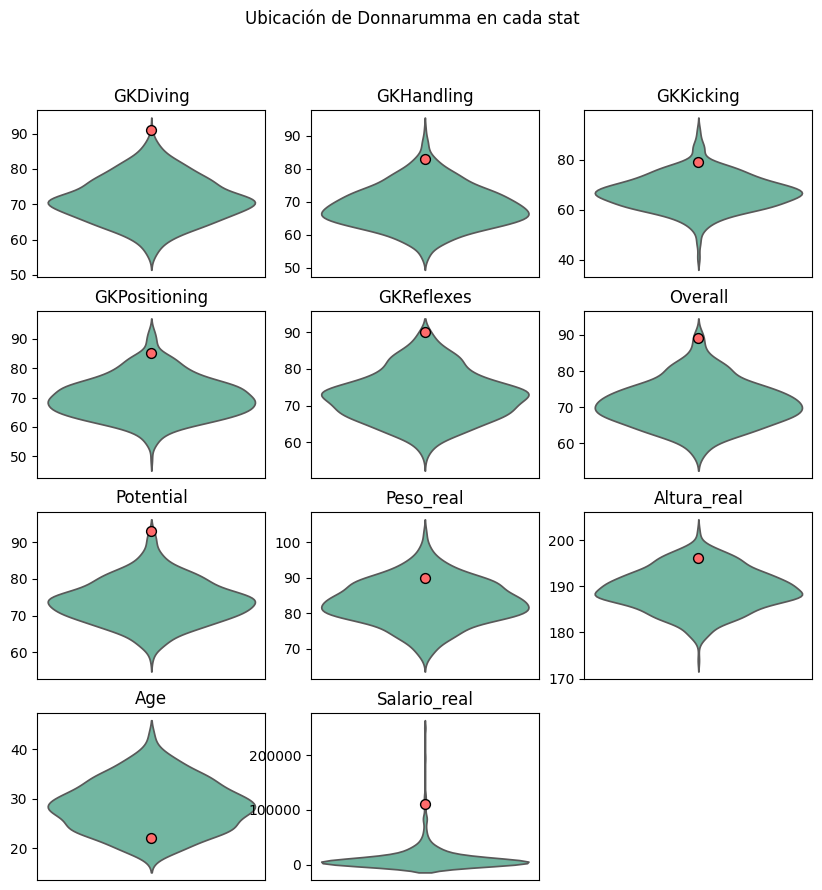

In [16]:



jugador = "G. Donnarumma"
df_arqueros["EsDonnaruma"] = df_arqueros["Name"] == jugador


plt.figure(figsize=(10,10))
sns.set_palette("Set2") 
for i, stat in enumerate(col_arquero+col_potencial+col_caracteristicas + col_salario):
    plt.subplot(4,3 , i+1)
    sns.violinplot(y=df_arqueros[stat], inner=None)
    plt.scatter(0, df_arqueros[df_arqueros["EsDonnaruma"]][stat], color="#FF6B6B", s=50, edgecolor="black")
    plt.title(stat)
    plt.ylabel("")
    plt.xticks([])

plt.suptitle("Ubicación de Donnarumma en cada stat")
plt.show()


